In [20]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

7


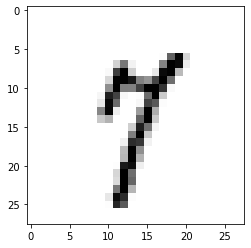

In [6]:
import matplotlib.pyplot as plt
image_index = 6707 # You may select anything up to 60,000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [18]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [21]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10


2022-04-12 12:42:33.293737: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 [==============================] - 26s 13ms/step - loss: 0.7379 - accuracy: 0.8615
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2508 - accuracy: 0.9304
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2018 - accuracy: 0.9446
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1822 - accuracy: 0.9504
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1629 - accuracy: 0.9555
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1498 - accuracy: 0.9598
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1417 - accuracy: 0.9620
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1333 - accuracy: 0.9645
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1372 - accuracy: 0.9633
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step - lo

In [ ]:
model.evaluate(x_test, y_test)
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())